In [1]:
from __future__ import division
import hoomd
import hoomd.md
import numpy
import ex_render
from matplotlib import pyplot
%matplotlib inline

In [2]:
# First simulation context (P = 1.0)

#-------Initialize and define the unit cell

sim1 = hoomd.context.initialize("");
uc = hoomd.lattice.unitcell(N = 1,
                            a1 = [10.8, 0,   0],
                            a2 = [0,    1.2, 0],
                            a3 = [0,    0,   1.2],
                            dimensions = 3,
                            position = [[0,0,0]],
                            type_name = ['R'],
                            mass = [1.0],
                            moment_inertia = [[0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2]],
                            orientation = [[1, 0, 0, 0]]);
system = hoomd.init.create_lattice(unitcell=uc, n=[2,18,18]);

#-----Add the particle type for the constituent particles, 

system.particles.types.add('A');

#-----Define each rigid body type in the local coordinate system of the body.

rigid = hoomd.md.constrain.rigid();
rigid.set_param('R', 
                types=['A']*8,
                positions=[(-4,0,0),(-3,0,0),(-2,0,0),(-1,0,0),
                           (1,0,0),(2,0,0),(3,0,0),(4,0,0)]);

#-----Instruct the rigid constraint to create the constituent particles

rigid.create_bodies()


#-----Define the potential energy

nl = hoomd.md.nlist.cell()
lj = hoomd.md.pair.lj(r_cut=2**(1/6), nlist=nl)
lj.set_params(mode='shift')
lj.pair_coeff.set(['R', 'A'], ['R', 'A'], epsilon=1.0, sigma=1.0)

#-----Select an NPT integrator

hoomd.md.integrate.mode_standard(dt=0.005);
rigid = hoomd.group.rigid_center();
hoomd.md.integrate.npt(group = rigid, kT = 1.0, tau = 0.5, tauP = 1.0, P = 1.0);
hoomd.dump.gsd("trajectory1.gsd",
               period=2e3,
               group=hoomd.group.all(),
               overwrite=True);  

#-----Write output

log = hoomd.analyze.log(filename="log-output1.log",
                         quantities=['num_particles',
                                     'ndof',
                                     'translational_ndof',
                                     'rotational_ndof',
                                     'potential_energy',
                                     'kinetic_energy',
                                     'translational_kinetic_energy',
                                     'rotational_kinetic_energy',
                                     'temperature',
                                     'pressure'],
                         period=100,
                         overwrite=True);

HOOMD-blue 2.4.2 DOUBLE HPMC_MIXED TBB SSE SSE2 
Compiled: 12/21/2018
Copyright 2009-2018 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU
notice(2): Group "all" created containing 648 particles
notice(2): constrain.rigid(): Creating 648 rigid bodies (adding 5184 particles)
notice(2): Group "rigid_center" created containing 648 particles


In [3]:
# Second simulation context (P = 2.0)

#-------Initialize and define the unit cell

sim2 = hoomd.context.initialize("");
uc = hoomd.lattice.unitcell(N = 1,
                            a1 = [10.8, 0,   0],
                            a2 = [0,    1.2, 0],
                            a3 = [0,    0,   1.2],
                            dimensions = 3,
                            position = [[0,0,0]],
                            type_name = ['R'],
                            mass = [1.0],
                            moment_inertia = [[0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2]],
                            orientation = [[1, 0, 0, 0]]);
system = hoomd.init.create_lattice(unitcell=uc, n=[2,18,18]);

#-----Add the particle type for the constituent particles, 

system.particles.types.add('A');

#-----Define each rigid body type in the local coordinate system of the body.

rigid = hoomd.md.constrain.rigid();
rigid.set_param('R', 
                types=['A']*8,
                positions=[(-4,0,0),(-3,0,0),(-2,0,0),(-1,0,0),
                           (1,0,0),(2,0,0),(3,0,0),(4,0,0)]);

#-----Instruct the rigid constraint to create the constituent particles

rigid.create_bodies()


#-----Define the potential energy

nl = hoomd.md.nlist.cell()
lj = hoomd.md.pair.lj(r_cut=2**(1/6), nlist=nl)
lj.set_params(mode='shift')
lj.pair_coeff.set(['R', 'A'], ['R', 'A'], epsilon=1.0, sigma=1.0)

#-----Select an NPT integrator

hoomd.md.integrate.mode_standard(dt=0.005);
rigid = hoomd.group.rigid_center();
hoomd.md.integrate.npt(group = rigid, kT = 1.0, tau = 0.5, tauP = 1.0, P = 2.0);
hoomd.dump.gsd("trajectory2.gsd",
               period=2e3,
               group=hoomd.group.all(),
               overwrite=True);  

#-----Write output

log = hoomd.analyze.log(filename="log-output2.log",
                         quantities=['num_particles',
                                     'ndof',
                                     'translational_ndof',
                                     'rotational_ndof',
                                     'potential_energy',
                                     'kinetic_energy',
                                     'translational_kinetic_energy',
                                     'rotational_kinetic_energy',
                                     'temperature',
                                     'pressure'],
                         period=100,
                         overwrite=True);

notice(2): Group "all" created containing 648 particles
notice(2): constrain.rigid(): Creating 648 rigid bodies (adding 5184 particles)
notice(2): Group "rigid_center" created containing 648 particles


In [4]:
# Third simulation context (P = 3.0)

#-------Initialize and define the unit cell

sim3 = hoomd.context.initialize("");
uc = hoomd.lattice.unitcell(N = 1,
                            a1 = [10.8, 0,   0],
                            a2 = [0,    1.2, 0],
                            a3 = [0,    0,   1.2],
                            dimensions = 3,
                            position = [[0,0,0]],
                            type_name = ['R'],
                            mass = [1.0],
                            moment_inertia = [[0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2]],
                            orientation = [[1, 0, 0, 0]]);
system = hoomd.init.create_lattice(unitcell=uc, n=[2,18,18]);

#-----Add the particle type for the constituent particles.

system.particles.types.add('A');

#-----Define each rigid body type in the local coordinate system of the body.

rigid = hoomd.md.constrain.rigid();
rigid.set_param('R', 
                types=['A']*8,
                positions=[(-4,0,0),(-3,0,0),(-2,0,0),(-1,0,0),
                           (1,0,0),(2,0,0),(3,0,0),(4,0,0)]);

#-----Instruct the rigid constraint to create the constituent particles

rigid.create_bodies()


#-----Define the potential energy

nl = hoomd.md.nlist.cell()
lj = hoomd.md.pair.lj(r_cut=2**(1/6), nlist=nl)
lj.set_params(mode='shift')
lj.pair_coeff.set(['R', 'A'], ['R', 'A'], epsilon=1.0, sigma=1.0)

#-----Select an NPT integrator

hoomd.md.integrate.mode_standard(dt=0.005);
rigid = hoomd.group.rigid_center();
hoomd.md.integrate.npt(group = rigid, kT = 1.0, tau = 0.5, tauP = 1.0, P = 3.0);
hoomd.dump.gsd("trajectory3.gsd",
               period=2e3,
               group=hoomd.group.all(),
               overwrite=True);  

#-----Write output

log = hoomd.analyze.log(filename="log-output3.log",
                         quantities=['num_particles',
                                     'ndof',
                                     'translational_ndof',
                                     'rotational_ndof',
                                     'potential_energy',
                                     'kinetic_energy',
                                     'translational_kinetic_energy',
                                     'rotational_kinetic_energy',
                                     'temperature',
                                     'pressure'],
                         period=100,
                         overwrite=True);

notice(2): Group "all" created containing 648 particles
notice(2): constrain.rigid(): Creating 648 rigid bodies (adding 5184 particles)
notice(2): Group "rigid_center" created containing 648 particles


In [5]:
# Simulation context using hoomd.variant

#-------Initialize and define the unit cell

sim4 = hoomd.context.initialize("");
uc = hoomd.lattice.unitcell(N = 1,
                            a1 = [10.8, 0,   0],
                            a2 = [0,    1.2, 0],
                            a3 = [0,    0,   1.2],
                            dimensions = 3,
                            position = [[0,0,0]],
                            type_name = ['R'],
                            mass = [1.0],
                            moment_inertia = [[0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2]],
                            orientation = [[1, 0, 0, 0]]);
system = hoomd.init.create_lattice(unitcell=uc, n=[2,18,18]);

#-----Add the particle type for the constituent particles.

system.particles.types.add('A');

#-----Define each rigid body type in the local coordinate system of the body.

rigid = hoomd.md.constrain.rigid();
rigid.set_param('R', 
                types=['A']*8,
                positions=[(-4,0,0),(-3,0,0),(-2,0,0),(-1,0,0),
                           (1,0,0),(2,0,0),(3,0,0),(4,0,0)]);

#-----Instruct the rigid constraint to create the constituent particles

rigid.create_bodies()

#-----Define the potential energy

nl = hoomd.md.nlist.cell()
lj = hoomd.md.pair.lj(r_cut=2**(1/6), nlist=nl)
lj.set_params(mode='shift')
lj.pair_coeff.set(['R', 'A'], ['R', 'A'], epsilon=1.0, sigma=1.0)

#-----Define pressure as a value that varies over time.

pressure = hoomd.variant.linear_interp(points = [(0, 1.0), (1e4, 10.0)], zero = 'now')


#-----Select an NPT integrator

hoomd.md.integrate.mode_standard(dt=0.005);
rigid = hoomd.group.rigid_center();
hoomd.md.integrate.npt(group = rigid, kT = 1.0, tau = 0.5, tauP = 1.0, P = pressure);
hoomd.dump.gsd("trajectory4.gsd",
               period=2e3,
               group=hoomd.group.all(),
               overwrite=True);  

#-----Write output

log = hoomd.analyze.log(filename="log-output4.log",
                         quantities=['num_particles',
                                     'ndof',
                                     'translational_ndof',
                                     'rotational_ndof',
                                     'potential_energy',
                                     'kinetic_energy',
                                     'translational_kinetic_energy',
                                     'rotational_kinetic_energy',
                                     'temperature',
                                     'pressure'],
                         period=100,
                         overwrite=True);

notice(2): Group "all" created containing 648 particles
notice(2): constrain.rigid(): Creating 648 rigid bodies (adding 5184 particles)
notice(2): Group "rigid_center" created containing 648 particles


In [6]:
with sim1:
    hoomd.run(1e4);

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 5832
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: yes
** starting run **
Time 00:00:54 | Step 3217 / 10000 | TPS 321.596 | ETA 00:00:21
Time 00:01:04 | Step 6365 / 10000 | TPS 314.533 | ETA 00:00:11
Time 00:01:14 | Step 9552 / 10000 | TPS 318.699 | ETA 00:00:01
Time 00:01:15 | Step 10000 / 10000 | TPS 321.837 | ETA 00:00:00
Average TPS: 318.418
---------
-- Neighborlist stats:
1529 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 11 / n_neigh_avg: 3.63323
shortest rebuild period: 2
-- Cell list stats:
Dimension: 13, 13, 13
n_min    : 0 / n_max: 7 / n_avg: 2.65453
** run complete **


In [7]:
with sim2:
    hoomd.run(1e4);

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 5832
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: yes
** starting run **
Time 00:01:29 | Step 3030 / 10000 | TPS 302.821 | ETA 00:00:23
Time 00:01:39 | Step 5798 / 10000 | TPS 276.716 | ETA 00:00:15
Time 00:01:49 | Step 8486 / 10000 | TPS 268.758 | ETA 00:00:05
Time 00:01:55 | Step 10000 / 10000 | TPS 258.917 | ETA 00:00:00
Average TPS: 278.871
---------
-- Neighborlist stats:
1511 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 14 / n_neigh_avg: 5.86265
shortest rebuild period: 2
-- Cell list stats:
Dimension: 12, 12, 12
n_min    : 1 / n_max: 7 / n_avg: 3.375
** run complete **


In [8]:
with sim3:
    hoomd.run(1e4);

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 5832
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: yes
** starting run **
Time 00:02:27 | Step 2811 / 10000 | TPS 281.053 | ETA 00:00:25
Time 00:02:37 | Step 5396 / 10000 | TPS 258.353 | ETA 00:00:17
Time 00:02:47 | Step 7898 / 10000 | TPS 250.152 | ETA 00:00:08
Time 00:02:55 | Step 10000 / 10000 | TPS 247.14 | ETA 00:00:00
Average TPS: 259.636
---------
-- Neighborlist stats:
1509 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 14 / n_neigh_avg: 5.95302
shortest rebuild period: 2
-- Cell list stats:
Dimension: 11, 11, 11
n_min    : 1 / n_max: 8 / n_avg: 4.38167
** run complete **


In [9]:
with sim4:
    hoomd.run(1e4);

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 5832
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: yes
** starting run **
Time 00:03:14 | Step 3050 / 10000 | TPS 304.935 | ETA 00:00:22
Time 00:03:24 | Step 5415 / 10000 | TPS 236.473 | ETA 00:00:19
Time 00:03:34 | Step 7671 / 10000 | TPS 225.582 | ETA 00:00:10
Time 00:03:44 | Step 9722 / 10000 | TPS 205.097 | ETA 00:00:01
Time 00:03:46 | Step 10000 / 10000 | TPS 200.326 | ETA 00:00:00
Average TPS: 241.582
---------
-- Neighborlist stats:
1431 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 15 / n_neigh_avg: 6.33162
shortest rebuild period: 2
-- Cell list stats:
Dimension: 11, 11, 11
n_min    : 1 / n_max: 8 / n_avg: 4.38167
** run complete **


In [10]:
data1 = numpy.genfromtxt(fname='log-output1.log', skip_header=True);
data2 = numpy.genfromtxt(fname='log-output2.log', skip_header=True);
data3 = numpy.genfromtxt(fname='log-output3.log', skip_header=True);
data4 = numpy.genfromtxt(fname='log-output4.log', skip_header=True);

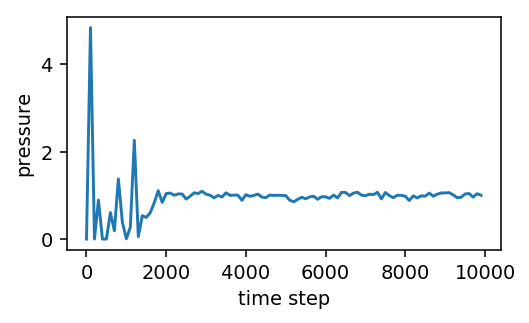

In [11]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data1[:,0], data1[:,10]);
pyplot.xlabel('time step');
pyplot.ylabel('pressure');

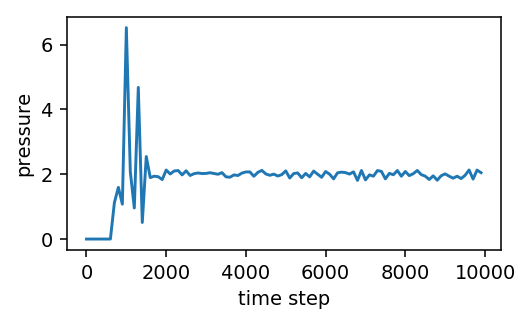

In [12]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data2[:,0], data2[:,10]);
pyplot.xlabel('time step');
pyplot.ylabel('pressure');

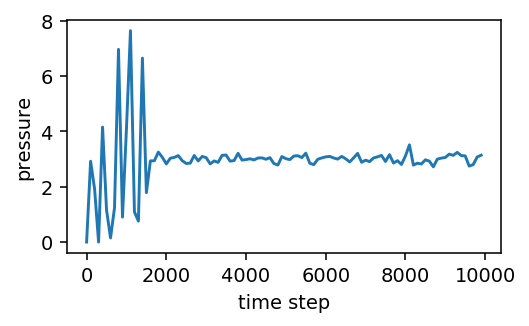

In [13]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data3[:,0], data3[:,10]);
pyplot.xlabel('time step');
pyplot.ylabel('pressure');

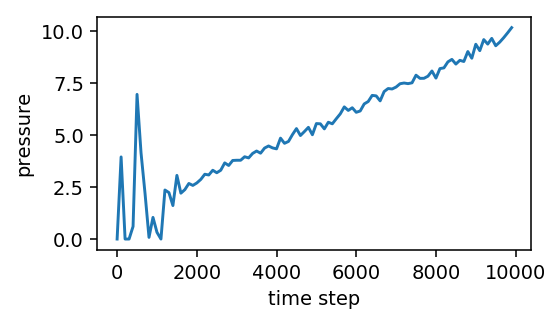

In [14]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data4[:,0], data4[:,10]);
pyplot.xlabel('time step');
pyplot.ylabel('pressure');

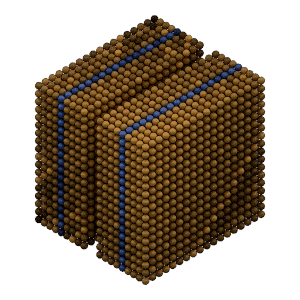

In [15]:
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory1.gsd');

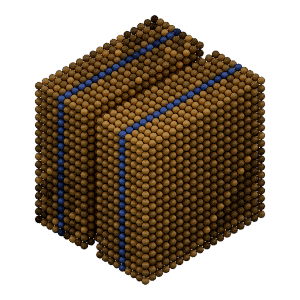

In [16]:
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory2.gsd');

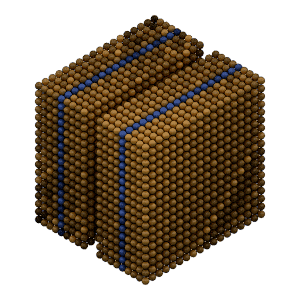

In [17]:
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory3.gsd');

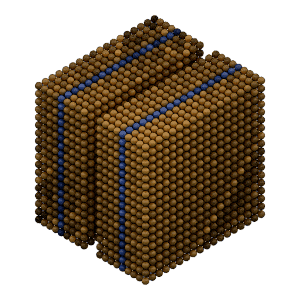

In [18]:
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory4.gsd');